# Extraction de connaissances à partir de données structurées et non structurées

## Séance 6 : Modélisation supervisée via régression

### Utilisation de python

## Librairies utilisées

Toujours dans le module sklearn, et particulièrement le sous-module `linear_model`

- Fonction `LinearRegression` pour faire un modèle linéaire généralisé
- Fonction `LogisitcRegression` pour faire un modèle de régression logistique

In [1]:
import pandas
import numpy
import matplotlib.pyplot as plt
import seaborn
seaborn.set_style("white")

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression

## Données utilisées

### Données `wine`

In [2]:
url_wine = "https://fxjollois.github.io/cours-2022-2023/m1-dci-ecd/wine.csv"
wine = pandas.read_csv(url_wine)
wine

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline,Alcohol_bin
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,> 13
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,> 13
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,> 13
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,> 13
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,> 13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,> 13
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,> 13
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,> 13
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,> 13


### Données `adult`

In [3]:
url_adult = "https://fxjollois.github.io/cours-2022-2023/m1-dci-ecd/adult.csv"
adult = pandas.read_csv(url_adult)
adult

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,class
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


## Régression linéaire

Pour cela, nous allons utiliser les données `wine`.

### Réalisation simple

La fonction `LinearRegression()` (ainsi que `LogisticRegression()`) nécessite de séparer la variable à prédire et les variables explicatives. Pour cela, nous créons ici 2 objets :

- `y` : variable à prédire
- `X` : variable(s) explicative(s)
    - l'usage des `[[]]` est obligatoire pour garder un format `array` pour `X`

In [4]:
X = wine[["Malic acid"]]
y = wine["Alcohol"]
m1 = LinearRegression().fit(X, y)

In [5]:
m1.coef_

array([0.06859796])

In [6]:
m1.intercept_

12.840349252602367

In [7]:
m1.score(X, y) # r2

0.00891078245324417

### Réalisation avec un modèle à 3 variables

In [8]:
X = wine[["Malic acid", "Color intensity", "Magnesium"]]
y = wine["Alcohol"]
m2 = LinearRegression().fit(X, y)

In [9]:
m2.coef_

array([-0.01888221,  0.1820084 ,  0.00940464])

In [10]:
m2.intercept_

11.186085337626954

In [11]:
m2.score(X, y) # r2

0.32632564681673604

#### Prédiction

On peut obtenir les prédictions sur les données d'apprentissage avec la fonction `predict()`. Bien évidémment, si on veut prédire sur d'autres données, on pourra utiliser la même fonction.

In [12]:
m2.predict(X)

array([13.37471294, 12.89013542, 13.12519929, 13.63165444, 13.03320378,
       13.43472861, 13.00916478, 13.20259199, 13.01381191, 13.39634935,
       13.17933487, 12.96162211, 13.00967878, 12.99208637, 13.4751115 ,
       13.53388912, 13.40683993, 13.43922888, 13.75523642, 13.14673113,
       13.36863897, 12.89264363, 12.79246461, 12.76460726, 12.69542319,
       12.96514178, 12.90093532, 12.75657693, 12.97554302, 12.91264779,
       13.14507816, 13.40749027, 12.82852532, 13.38145291, 12.95104263,
       13.020615  , 13.02686714, 12.85011975, 12.75284746, 13.2427816 ,
       13.36985069, 12.73899086, 13.08857183, 12.8731683 , 13.07628224,
       13.10743985, 12.96941226, 13.21448273, 13.24507289, 13.78899459,
       13.32910613, 13.05821254, 13.48011531, 13.37839523, 13.32904827,
       13.38190942, 13.42494625, 13.20021068, 13.41244161, 12.35086044,
       12.71035064, 13.14741746, 12.73815031, 12.79288918, 12.67371309,
       12.92213086, 12.86522045, 12.74935409, 12.77981268, 13.10

On peut ainsi croiser les données observées (en abcisses ici) et les valeurs prédites (en ordonnées donc).

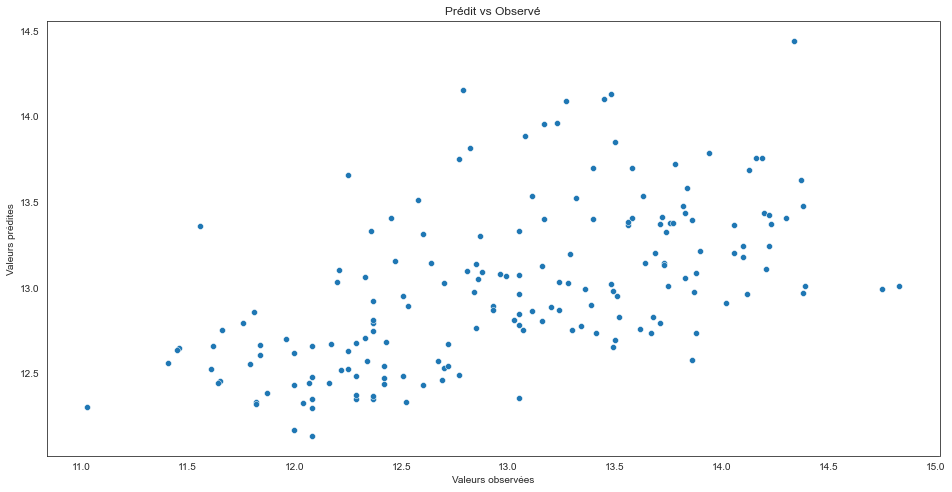

In [13]:
plt.figure(figsize = (16,8))
plt.title("Prédit vs Observé")
g = seaborn.scatterplot(x = y, y = m2.predict(X))
g.set(xlabel = "Valeurs observées", ylabel = "Valeurs prédites")
plt.show()

## Régression logisitique

Ici nous allons utiliser les données `adult`, dans lesquelles nous allons n'utiliser que certaines variables.

### Réalisation

Pour la régression logisitique, nous allons devoir créer un encodage disjonctif complet (aussi appelé *one-hot encoding*) des variables qualitatives. Par exemple, d'une variable à 2 modalités, nous allons créer 2 variables binaires. Pour cela, nous avons besoin de la fonction `OneHotEncoder()` du sous-module `preprocessing`.

In [14]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()

Voici un petit exemple de comment elle fonctionne

In [15]:
enc = encoder.fit(adult[["sex"]])

In [16]:
enc.categories_

[array(['Female', 'Male'], dtype=object)]

In [17]:
enc.transform(adult[["sex"]]).toarray()

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [0., 1.],
       [1., 0.]])

Pour créer reformater notre jeu de données, nous appliquons cela sur l'ensemble des variables qualitatives explicatives. Et à chaque fois, nous concaténons le résultat aux variables quantitatives.

In [18]:
X = adult[['age', 'capital_gain', 'capital_loss', 'hours_per_week']]

var_qual = ['workclass', 'education', 'marital_status', 'occupation', 'relationship', 'race', 'sex', 'native_country']
for v in var_qual:
    enc = encoder.fit(adult[[v]])
    enc_df = pandas.DataFrame(enc.transform(adult[[v]]).toarray(), columns = [v+":"+c for c in enc.categories_[0]])
    X = pandas.concat([X, enc_df], axis = 1)

X

,age,capital_gain,capital_loss,hours_per_week,workclass:?,workclass:Federal-gov,workclass:Local-gov,workclass:Never-worked,workclass:Private,workclass:Self-emp-inc,...,native_country:Portugal,native_country:Puerto-Rico,native_country:Scotland,native_country:South,native_country:Taiwan,native_country:Thailand,native_country:Trinadad&Tobago,native_country:United-States,native_country:Vietnam,native_country:Yugoslavia
0,39,2174,0,40,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,50,0,0,13,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,0,0,40,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,53,0,0,40,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,28,0,0,40,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,0,0,38,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32557,40,0,0,40,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32558,58,0,0,40,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
32559,22,0,0,20,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Nous pouvons maintenant créer notre modèle.

In [19]:
y = adult["class"]
m3 = LogisticRegression(max_iter = 10000).fit(X, y)

In [20]:
m3.score(X, y) # r2

0.8516630324621479

#### Prédiction

On peut obtenir les prédictions sur les données d'apprentissage avec la fonction `predict()`. Bien évidémment, si on veut prédire sur d'autres données, on pourra utiliser la même fonction.

In [21]:
m3.predict(X)

array(['<=50K', '<=50K', '<=50K', ..., '<=50K', '<=50K', '>50K'],
      dtype=object)

Nous avons aussi accès aux probabilités de prévision pour chaque individu.

In [22]:
m3.predict_proba(X)

array([[0.86743459, 0.13256541],
       [0.57431367, 0.42568633],
       [0.97675684, 0.02324316],
       ...,
       [0.96464562, 0.03535438],
       [0.9961107 , 0.0038893 ],
       [0.00499158, 0.99500842]])

On peut ainsi croiser les données observées (en colonnes ici) et les valeurs prédites (en lignes donc).

In [23]:
pandas.crosstab(m3.predict(X), y)

class,<=50K,>50K
row_0,,
<=50K,23002,3112
>50K,1718,4729


### Courbes et critères de qualité

#### ROC

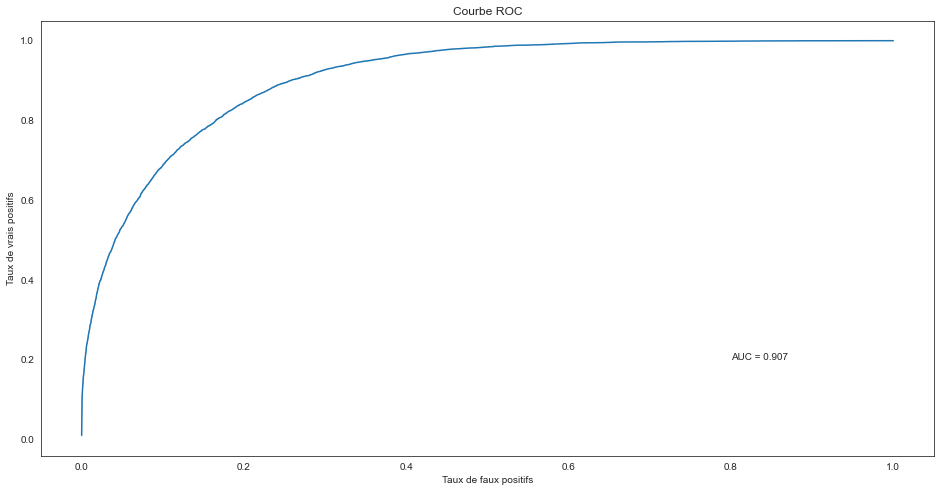

In [24]:
from sklearn.metrics import roc_curve, auc

fpr, tpr, th = roc_curve(numpy.array([(yy == ">50K") * 1 for yy in y]), pandas.DataFrame(m3.predict_proba(X))[1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize = (16,8))
plt.title("Courbe ROC")
g = seaborn.lineplot(x = fpr, y = tpr)
g.set(xlabel = "Taux de faux positifs", ylabel = "Taux de vrais positifs")
plt.text(.8, .2, "AUC = %0.3f" % roc_auc)
plt.show()

#### Precision/Recall

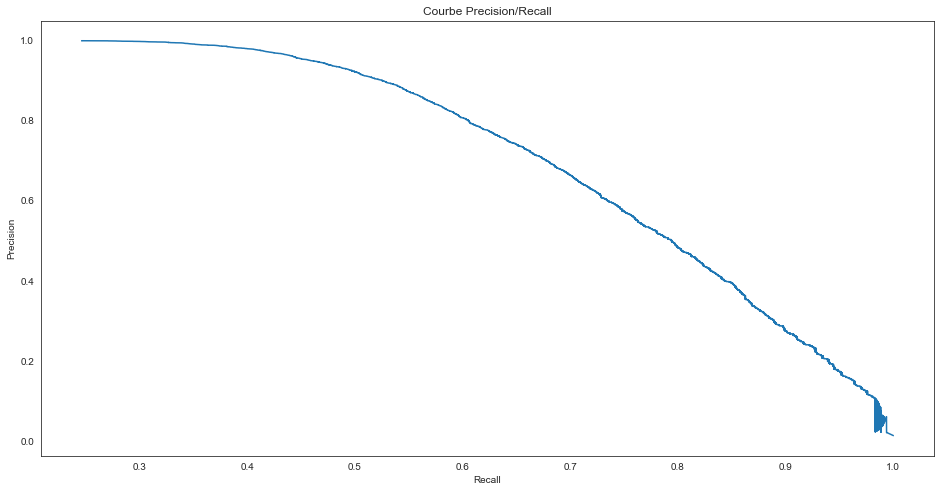

In [25]:
from sklearn.metrics import precision_recall_curve

pr, rc, th = precision_recall_curve(numpy.array([(yy == ">50K") * 1 for yy in y]), 
                                    pandas.DataFrame(m3.predict_proba(X))[1])

plt.figure(figsize = (16,8))
plt.title("Courbe Precision/Recall")
g = seaborn.lineplot(x = pr, y = rc)
g.set(xlabel = "Recall", ylabel = "Precision")
plt.show()

## Exercice

Nous allons sur des données de détection de *spam* (assez anciennes pour information), disponible sur [cette page](https://archive.ics.uci.edu/ml/datasets/Spambase). 

In [26]:
url_spam = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.data"
spam = pandas.read_csv(url_spam, header = None)
spam

,0,1,2,3,4,5,6,7,8,9,...,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


Comme vous pouvez le voir, ces données n'ont pas de noms de variables. Ceux-ci sont disponibles dans un fichier `spambase.names` (cf page web des données), à partir de la ligne 34. Nous les importons donc, pour les ajouter à notre `DataFrame`.

In [27]:
url_names = "https://archive.ics.uci.edu/ml/machine-learning-databases/spambase/spambase.names"
spam_names = pandas.read_table(url_names, sep = ":", header = None, skiprows = 33, names = ["var", "type"])
spam_names.head()

,var,type
0,word_freq_make,continuous.
1,word_freq_address,continuous.
2,word_freq_all,continuous.
3,word_freq_3d,continuous.
4,word_freq_our,continuous.


On ajoute la variable `spam` qui indique si le mail est un spam (1) ou non (0). Et on a au final notre `DataFrame` correctement configuré.

In [28]:
spam.columns = list(spam_names["var"]) + ["spam"]
spam

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,...,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,...,0.000,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,...,0.010,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,...,0.000,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4596,0.31,0.00,0.62,0.0,0.00,0.31,0.00,0.00,0.00,0.00,...,0.000,0.232,0.0,0.000,0.000,0.000,1.142,3,88,0
4597,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.000,0.000,0.0,0.353,0.000,0.000,1.555,4,14,0
4598,0.30,0.00,0.30,0.0,0.00,0.00,0.00,0.00,0.00,0.00,...,0.102,0.718,0.0,0.000,0.000,0.000,1.404,6,118,0
4599,0.96,0.00,0.00,0.0,0.32,0.00,0.00,0.00,0.00,0.00,...,0.000,0.057,0.0,0.000,0.000,0.000,1.147,5,78,0


#### A faire

Vous devez donc réaliser les étapes suivantes :

- Calculer le modèle complet expliquant la variable `spam`, avec toutes les autres
    - Evaluer la performance du modèle à l'aide des outils vus en cours
    - Afficher la distribution des probabilités d'estimer 1 ou 0, pour chaque classe (1 ou 0)
    - Commenter les résultats
- Pour chaque variable explicative commençant par `word` ou `char`, créer une variable binaire (1 ou 0) indiquant s'il y a présence ou non du mot ou du caractère (prendre comme seuil une valeur raisonnable, à tester)
- Calculer le modèle à l'aide de ces nouvelles variables (et de celles commençant par `capital`)
    - Comparer ces résultats au premier modèle

On peut se poser la question de la pertinence de prendre autant de variables. Il est souvent intéressant de regarder la performance des modèles à 1 variable explicative. Cela peut amener parfois à des modèles, certes moins performants, mais de peu et surtout moins gourmand en temps de calcul et en contraintes.

- Pour chaque variable explicative (originale et créée), calculer le modèle simple et garder les résultats intéressants dans un `DataFrame` ($R^2$, proportion de bien prédits et AUC par exemple)
    - Afficher les 10 meilleurs modèles simples à une variable
    